In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

from karabo_data import RunDirectory
from karabo_data.geometry import LPDGeometry

/home/kluyvert/.conda/envs/karabo_data/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
run = RunDirectory('/gpfs/exfel/exp/FXE/201701/p002016/proc/r0216')
run.info()

# of trains:    507
Duration:       0:00:50.600000
First train ID: 1487289920
Last train ID:  1487290426

13 detector modules (LPD)
  e.g. module LPD00 : 256 x 256 pixels
  30 frames per train, 15180.0 total frames

0 instrument devices (excluding detectors):

0 control devices:



In [3]:
tid, train_data = run.train_from_id(1487290326)
print(tid)
sorted(train_data.keys())

1487290326


['FXE_DET_LPD1M-1/DET/0CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/11CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/12CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/13CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/14CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/15CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/1CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/2CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/4CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/6CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/7CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/8CH0:xtdf',
 'FXE_DET_LPD1M-1/DET/9CH0:xtdf']

In [4]:
train_data['FXE_DET_LPD1M-1/DET/11CH0:xtdf'].keys()

dict_keys(['header.dataId', 'header.linkId', 'header.magicNumberBegin', 'header.majorTrainFormatVersion', 'header.minorTrainFormatVersion', 'header.pulseCount', 'header.reserved', 'header.trainId', 'metadata', 'image.cellId', 'image.data', 'image.gain', 'image.length', 'image.pulseId', 'image.status', 'image.trainId', 'detector.data', 'detector.trainId', 'trailer.checksum', 'trailer.magicNumberEnd', 'trailer.status', 'trailer.trainId'])

In [5]:
modules_data = {}
for i in range(16):
    try:
        img = train_data['FXE_DET_LPD1M-1/DET/%dCH0:xtdf' % i]['image.data']
    except KeyError:
        continue
    print(i, img.shape)
    modules_data[i] = img

0 (30, 256, 256)
1 (30, 256, 256)
2 (30, 256, 256)
4 (30, 256, 256)
6 (30, 256, 256)
7 (30, 256, 256)
8 (30, 256, 256)
9 (30, 256, 256)
11 (30, 256, 256)
12 (30, 256, 256)
13 (30, 256, 256)
14 (30, 256, 256)
15 (30, 256, 256)


In [6]:
from karabo_data.geometry import splitChannelDataIntoTiles
m0_data = modules_data[0]
splitted = splitChannelDataIntoTiles(m0_data)
splitted.shape

(16, 30, 128, 32)

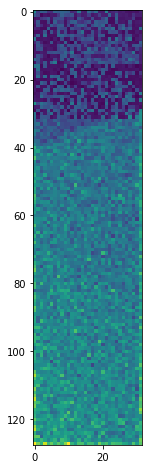

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(splitted[5][1])

In [8]:
for md in modules_data.values():
    #md[np.isnan(md)] = 0
    print(md.min(), md.max())

-4095.0 3901.0
-4062.5 3496.5
-3330.0 4078.0
-4095.0 3991.0
-4086.0 3961.0
-4095.0 4090.0
-3496.0 4055.0
-2997.0 3455.0
-3016.0 4025.0
-4095.0 4094.0
-4095.0 4054.0
-4095.0 3663.0
-2889.0 4016.0


In [9]:
import h5py

quadpos = [(11.4, -299), (11.5, -8), (-254.5, 16), (-278.5, -275)]  # MAR 18
with h5py.File('lpd_mar_18.h5', 'r') as f:
    geom = LPDGeometry.from_h5_file_and_quad_positions(f, quadpos)

In [10]:
{k: v.offset for (k, v) in geom.children.items()}

{'Q1': array([ 0.0114, -0.299 ]),
 'Q2': array([ 0.0115, -0.008 ]),
 'Q3': array([-0.2545,  0.016 ]),
 'Q4': array([-0.2785, -0.275 ])}

In [11]:
res = geom.position_all_modules(modules_data)

In [12]:
res.shape

(30, 1500, 1500)

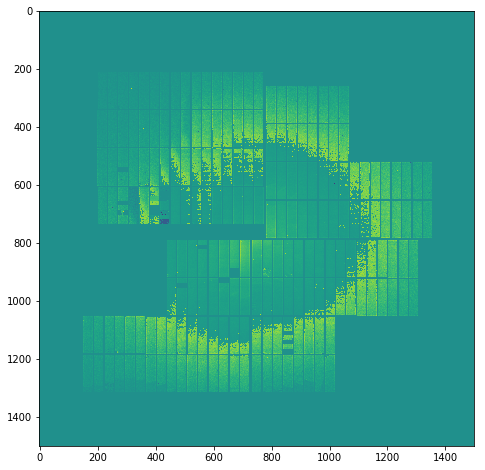

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(res[1])